In [12]:
# load brain data
# plot subcortical in canlab atlas
# plot parcel in glasser
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting, image
from neuromaps.datasets import fetch_fslr
from neuromaps import transforms
import nibabel as nib

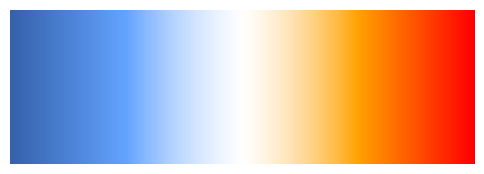

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Define the colors with specified opacities
colors_with_opacity = [
    (-0.015, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.0005, to_rgba("#63a4ff", alpha=1)),    # Fully opaque
    (0, to_rgba("white", alpha=0.5)),          # Transparent
    (0.0005, to_rgba("#ffa300", alpha=1)),    # Fully opaque
    (0.015, to_rgba("#ff0000", alpha=1.0))   # Fully opaque
]

# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
norm_points = np.linspace(-0.045, 0.045, len(colors_with_opacity))
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())
norm_colors = [c[1] for c in colors_with_opacity]

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient to visualize the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()


In [20]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', 
                        color_range=None):
                        # filename='brain_surface_plot.png'):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    - filename: Filename to save the plot. Defaults to 'brain_surface_plot.png'.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior', 'dorsal'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
#     p.savefig(filename, dpi=300)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [14]:
nps_fname = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.img'

In [15]:
img = nib.load(nps_fname)
nib.save(img, '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.nii.gz')

In [23]:
NPS = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr_FDR05_smoothed_fwhm05.nii.gz'

In [80]:
adjusted_norm_colors

[(0.1450980392156863, 0.27450980392156865, 0.47843137254901963, 1.0),
 (0.2784313725490196, 0.4588235294117647, 0.8196078431372549, 1.0),
 (0.5176470588235295, 0.7764705882352941, 0.9921568627450981, 1),
 (1.0, 1.0, 1.0, 0),
 (1.0, 0.6392156862745098, 0.0, 1),
 (1.0, 0.4980392156862745, 0.0, 1.0),
 (0.8274509803921568, 0.0, 0.0, 1.0)]

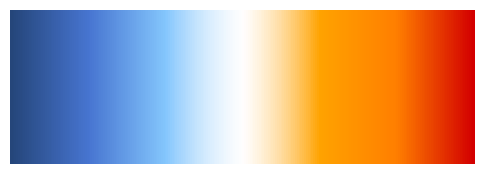

In [174]:
import matplotlib.colors as mcolors

# Define the adjusted colors with higher saturation and contrast
adjusted_colors_with_opacity = [
    (-2, to_rgba("#25467a", alpha=1)),  # Dark blue, fully opaque
    (-1, to_rgba("#4775d1", alpha=1)),  # Brighter blue, fully opaque
    (-.5, to_rgba("#84c6fd", alpha = 1)),
    (0, to_rgba("white", alpha=.5)),           # Transparent for zero values
    (-0.5, to_rgba("#ffa300", alpha=1)), 
    (1, to_rgba("#ff7f00", alpha=1)),   # Bright orange, fully opaque
    (2, to_rgba("#d30000", alpha=1))    # Dark red, fully opaque
]

# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
adjusted_norm_points = np.linspace(-2, 2, len(adjusted_colors_with_opacity))
adjusted_norm_points = (adjusted_norm_points - adjusted_norm_points.min()) / (adjusted_norm_points.max() - adjusted_norm_points.min())
adjusted_norm_colors = [c[1] for c in adjusted_colors_with_opacity]

# Create an adjusted custom colormap
adjusted_cmap = LinearSegmentedColormap.from_list("adjusted_custom_gradient", list(zip(adjusted_norm_points, adjusted_norm_colors)))

# Create a gradient to visualize the adjusted colormap
adjusted_gradient = np.linspace(0, 1, 256)
adjusted_gradient = np.vstack((adjusted_gradient, adjusted_gradient))

# Plot the gradient for the adjusted colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(adjusted_gradient, aspect='auto', cmap=adjusted_cmap)
ax.set_axis_off()

plt.show()


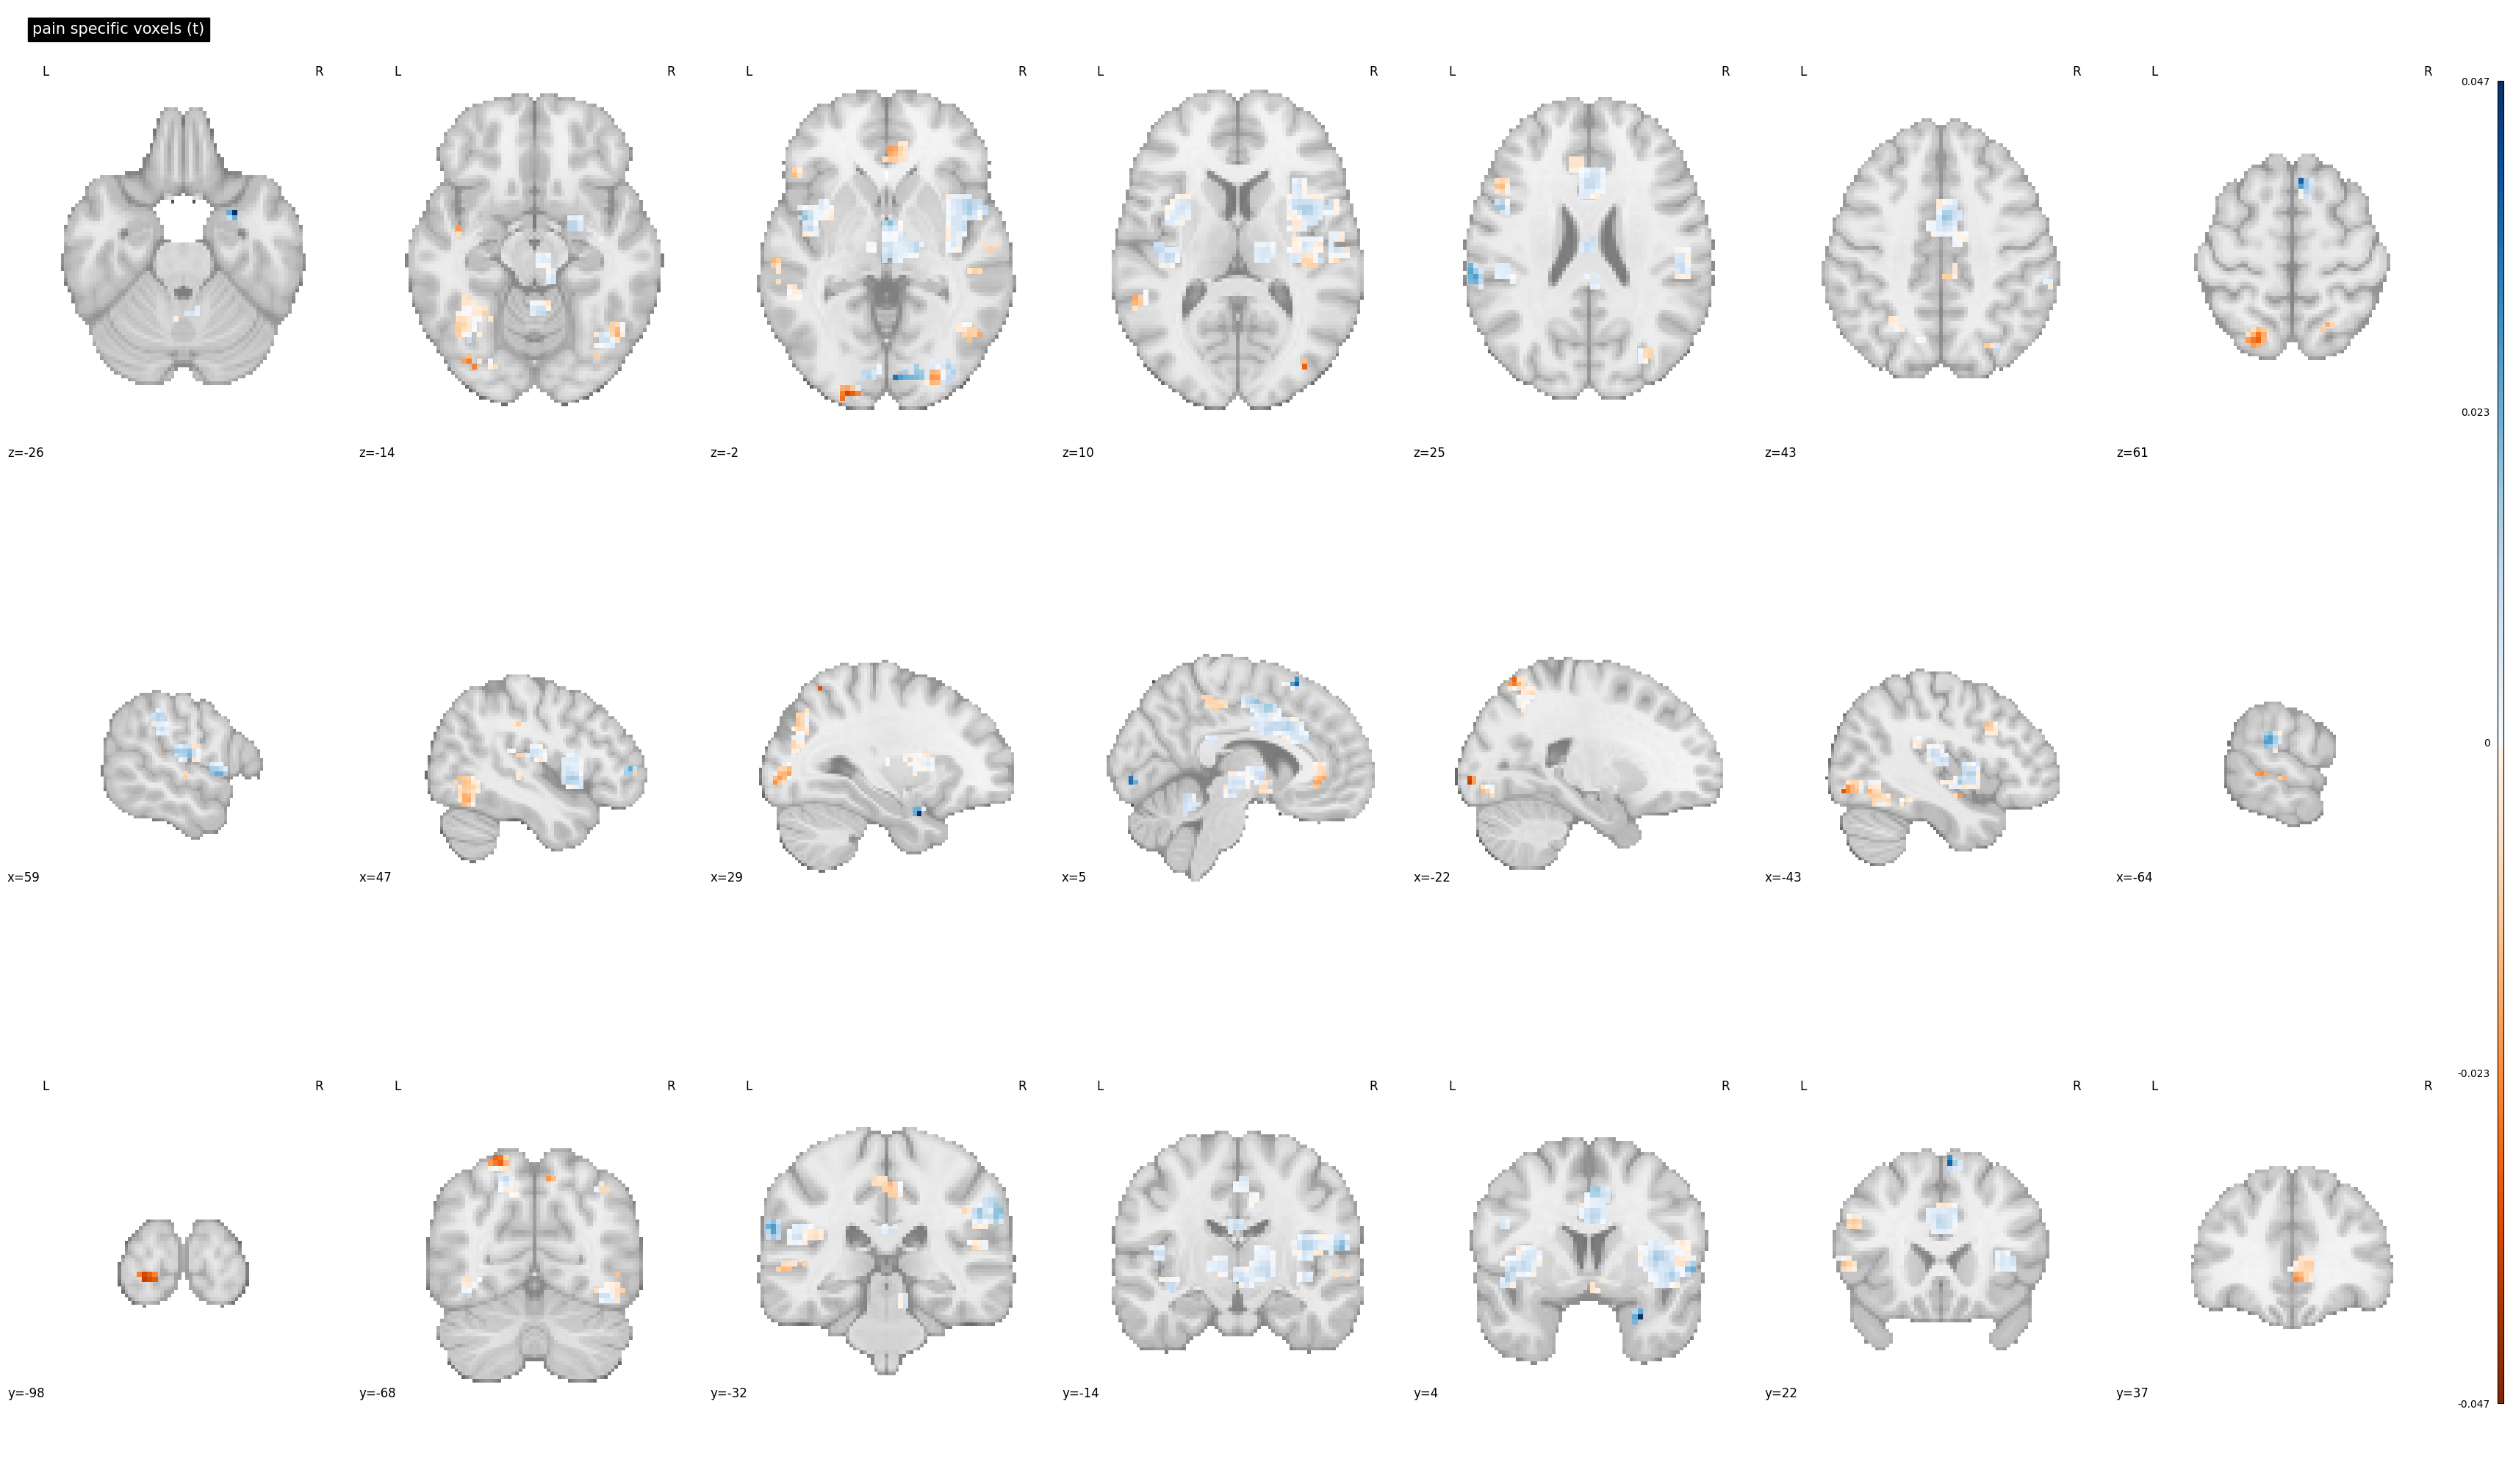

In [129]:
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)', cmap=newcmp)


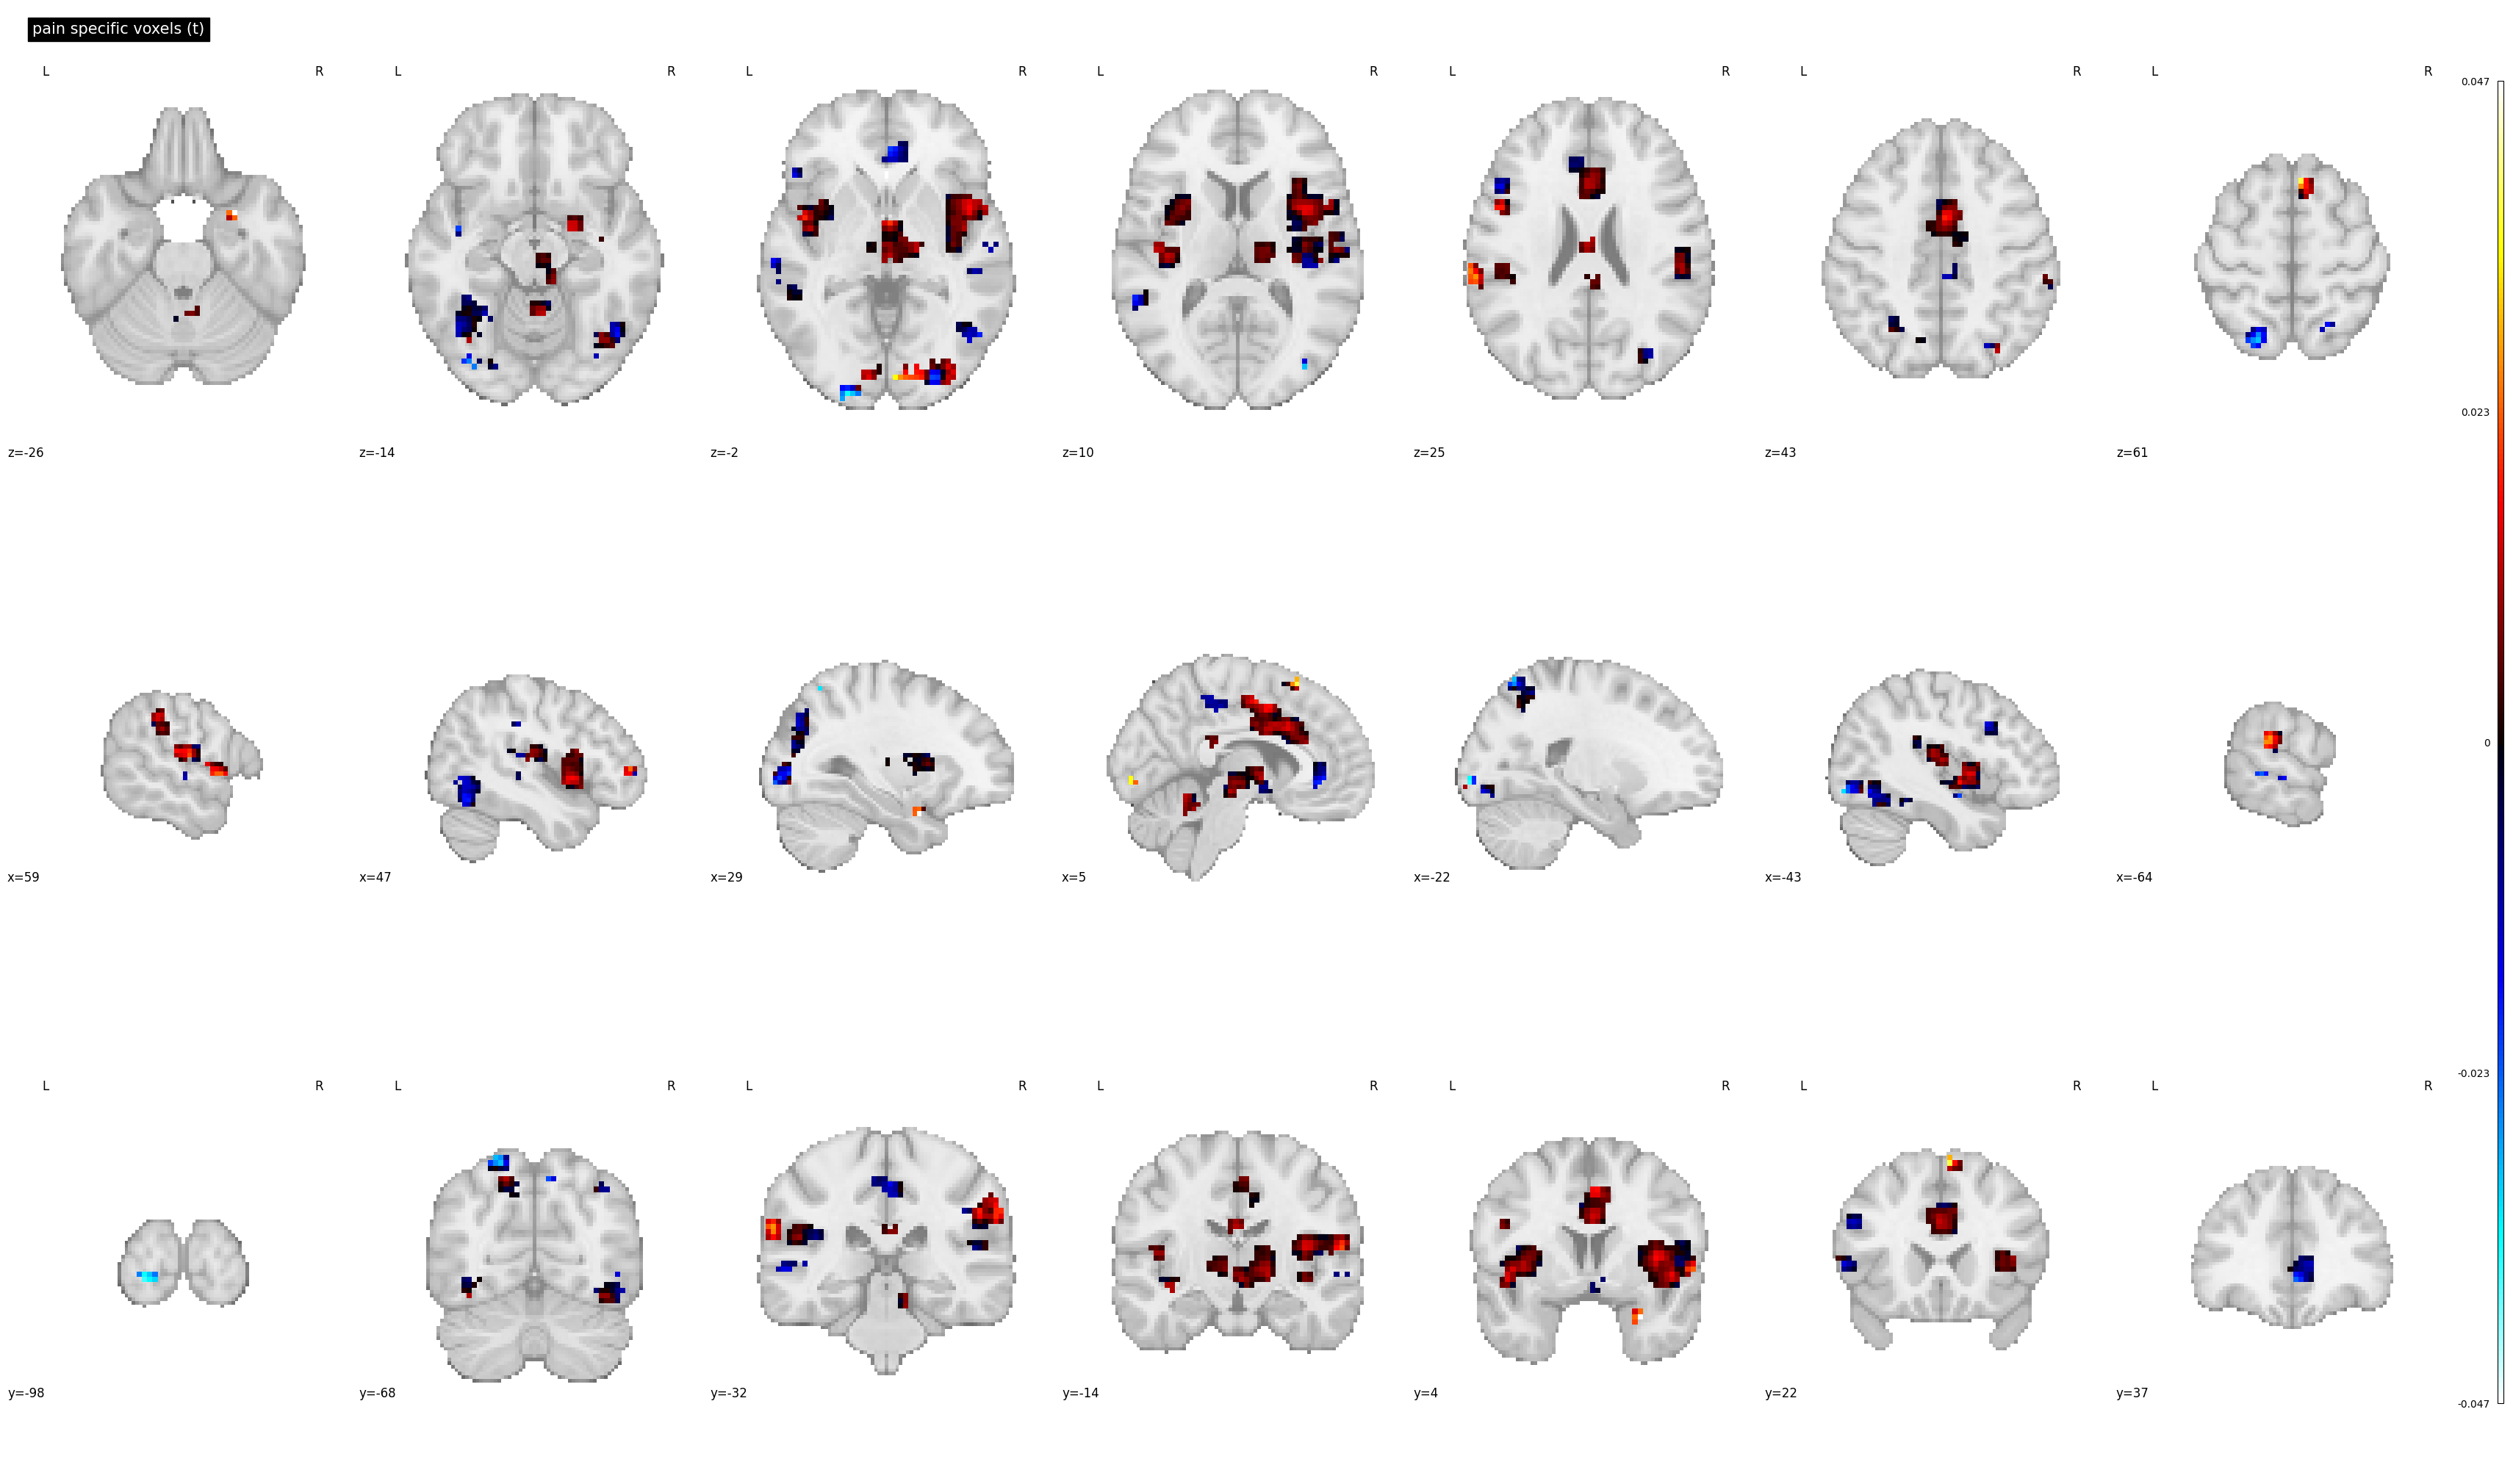

In [109]:
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)')


pain range: 0.029916884377598763 -0.023853827267885208


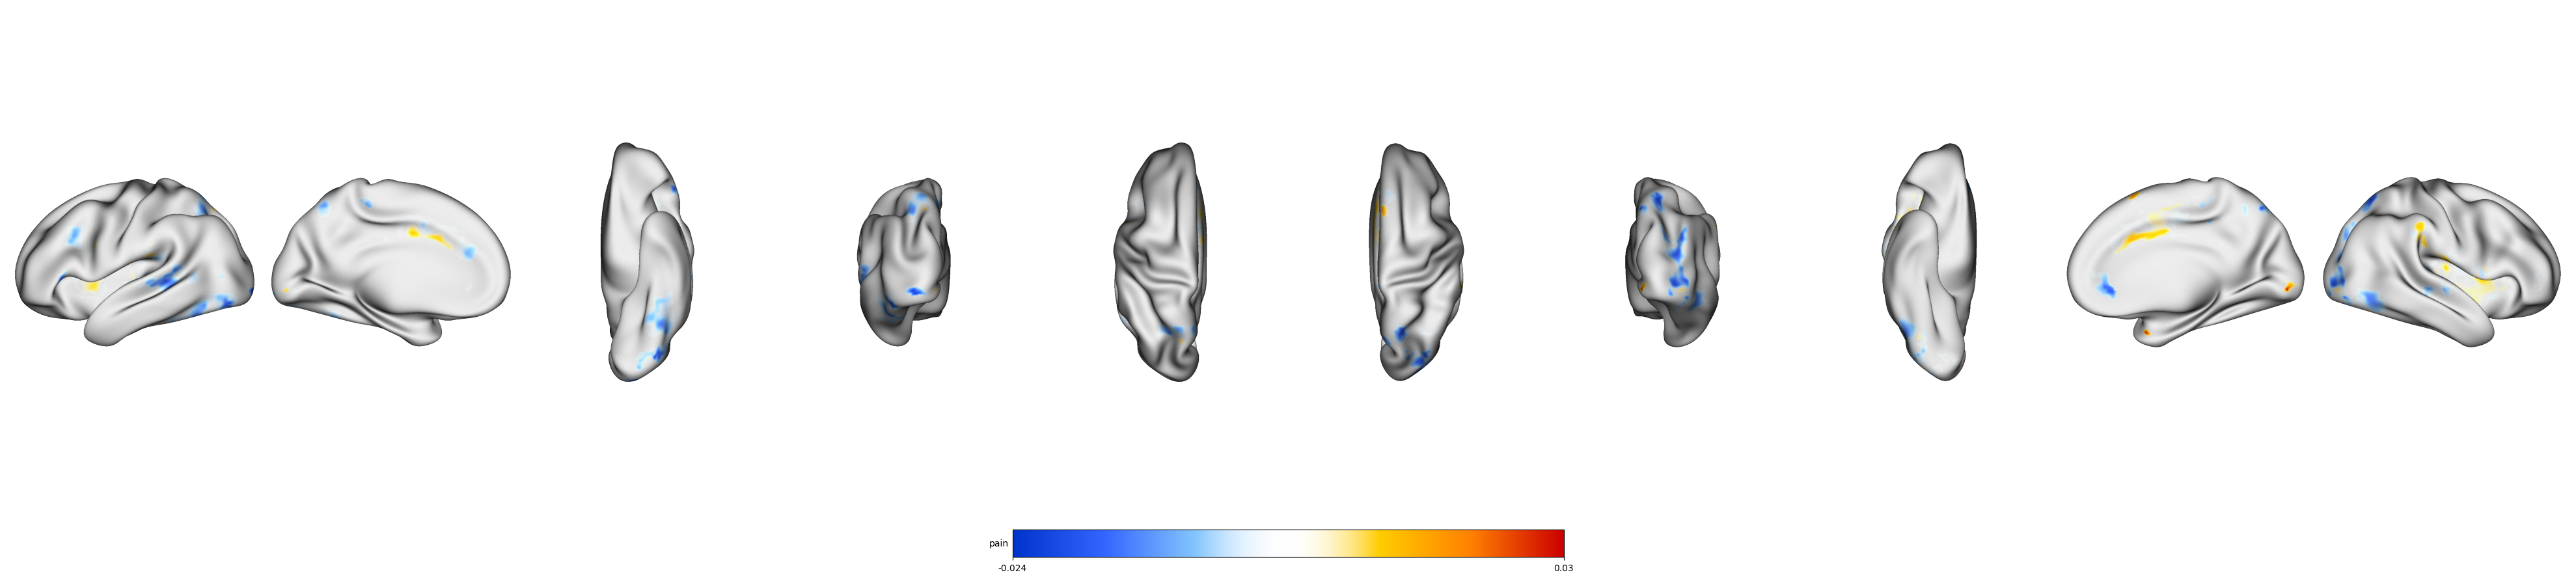

In [149]:
pain_stim_fslr = transforms.mni152_to_fslr(NPS, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()))
min_pain = min(np.min(pain_stim_fslr[0].agg_data()), np.min(pain_stim_fslr[1].agg_data()))
print(f"pain range: {max_pain} {min_pain}")
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()),
              np.abs(np.min(pain_stim_fslr[0].agg_data())), np.abs(np.max(pain_stim_fslr[0].agg_data())))
p = plot_brain_surfaces(pain_stim_fslr, cbar_label='pain', cmap=bright_cmap)
                    # color_range=(-np.round(max_pain), np.round(np.max(max_pain))))


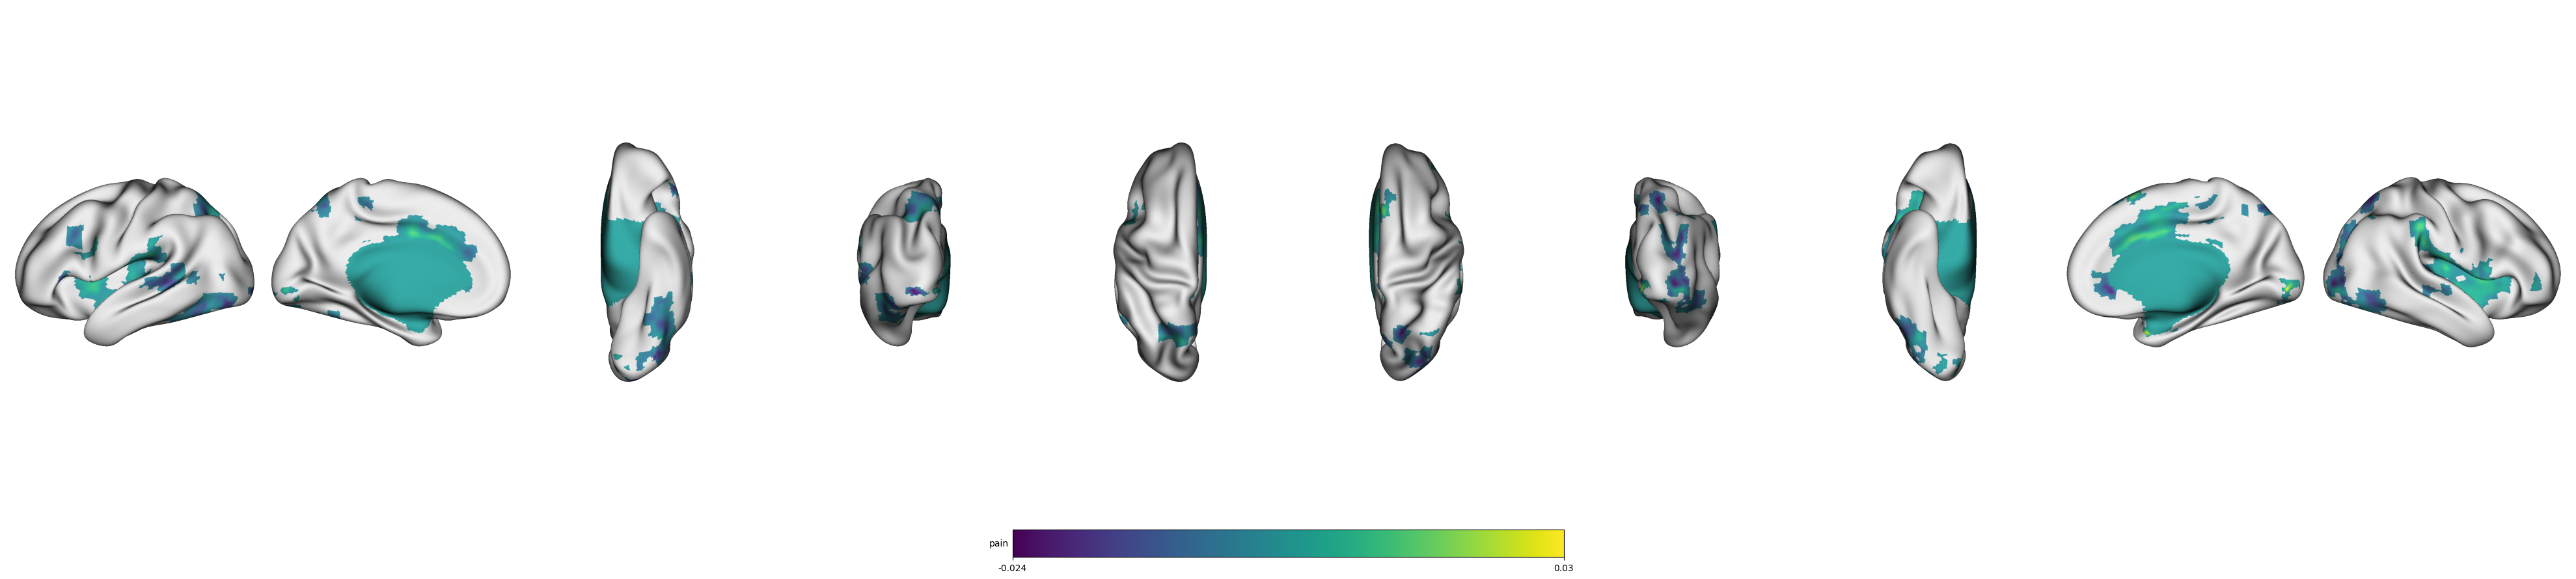

In [137]:
p = plot_brain_surfaces(pain_stim_fslr, cbar_label='pain')

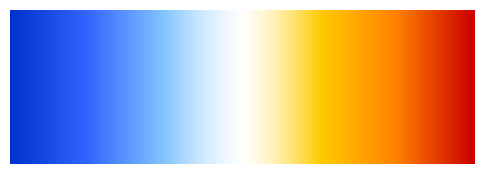

In [177]:
# Re-define the adjusted colors with bright and vivid colors across the specified range
bright_colors_with_opacity = [
    (-0.005, to_rgba("#0033cc", alpha=1)),  # Dark blue, fully opaque
    (-0.001, to_rgba("#3366ff", alpha=1)),  # Bright blue, fully opaque
    (-0.0000000001, to_rgba("#84c6fd", alpha=1)),  # Lighter blue, fully opaque
    (0, to_rgba("white", alpha=0.5)),           # White and fully transparent for zero values
    (0.0000000001, to_rgba("#ffcc00", alpha=1)),  # Bright yellow, fully opaque
    (0.001, to_rgba("#ff8000", alpha=1)),   # Bright orange, fully opaque
    (0.005, to_rgba("#cc0000", alpha=1))    # Bright red, fully opaque
]

# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
bright_norm_points = np.linspace(-0.005, 0.005, len(bright_colors_with_opacity))
bright_norm_points = (bright_norm_points - bright_norm_points.min()) / (bright_norm_points.max() - bright_norm_points.min())
bright_norm_colors = [c[1] for c in bright_colors_with_opacity]

# Create a bright custom colormap
bright_cmap = LinearSegmentedColormap.from_list("bright_custom_gradient", list(zip(bright_norm_points, bright_norm_colors)))

# Create a gradient to visualize the bright colormap
bright_gradient = np.linspace(0, 1, 256)
bright_gradient = np.vstack((bright_gradient, bright_gradient))

# Plot the gradient for the bright colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(bright_gradient, aspect='auto', cmap=bright_cmap)
ax.set_axis_off()

plt.show()


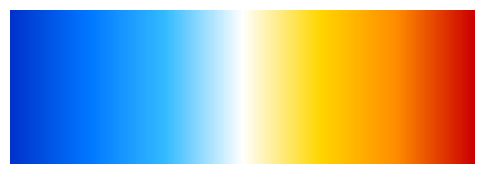

In [202]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Adjusted color definitions for clearer transitions and vivid colors
bright_colors_with_opacity = [
    (-0.000000001, to_rgba("#0033cc", alpha=1)),  # Dark blue, fully opaque
    (-0.0000000005, to_rgba("#0077FF", alpha=1)),  # Medium blue, fully opaque
    (-0.0000000001, to_rgba("#33BBFF", alpha=1)),  # Light blue, fully opaque
    (0, to_rgba("white", alpha=1)),  # White, fully opaque for zero values
    (0.0000000001, to_rgba("#FFD700", alpha=1)),  # Gold, fully opaque
    (0.0000000005, to_rgba("#FF8C00", alpha=1)),  # Dark orange, fully opaque
    (0.000000001, to_rgba("#CC0000", alpha=1))  # Bright red, fully opaque
]

# Normalize the points to the [0, 1] interval for the colormap
bright_norm_points = np.linspace(0, 1, len(bright_colors_with_opacity))

# Prepare the colors for the colormap
bright_norm_colors = [c[1] for c in bright_colors_with_opacity]

# Create the bright custom colormap
bright_cmap = LinearSegmentedColormap.from_list("bright_custom_gradient", list(zip(bright_norm_points, bright_norm_colors)))

# Create a gradient to visualize the bright colormap
bright_gradient = np.linspace(0, 1, 256)
bright_gradient = np.vstack((bright_gradient, bright_gradient))

# Plot the gradient for the bright colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(bright_gradient, aspect='auto', cmap=bright_cmap)
ax.set_axis_off()
plt.show()


# no threshold

In [150]:


nps_fname = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.img'
img = nib.load(nps_fname)
nib.save(img, '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz')

In [192]:
np.median(image.load_img(NPS).get_fdata().ravel())

0.0

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 5.0000e+00, 2.0000e+00, 9.0000e+00, 3.0000e+00,
        1.1000e+01, 4.0000e+00, 9.0000e+00, 1.8000e+01, 2.1000e+01,
        2.4000e+01, 2.2000e+01, 2.9000e+01, 3.0000e+01, 4.5000e+01,
        4.7000e+01, 5.3000e+01, 6.3000e+01, 7.7000e+01, 1.0100e+02,
        1.3100e+02, 1.5600e+02, 1.7500e+02, 1.9400e+02, 2.1900e+02,
        2.9400e+02, 3.2600e+02, 3.2200e+02, 4.1100e+02, 4.8100e+02,
        5.4200e+02, 5.7800e+02, 2.6239e+05, 5.8400e+02, 5.5800e+02,
        5.1900e+02, 5.0100e+02, 4.2400e+02, 3.8500e+02, 3.2000e+02,
        2.5900e+02, 2.4600e+02, 1.9900e+02, 1.6000e+02, 1.1600e+02,
        1.1500e+02, 7.2000e+01, 8.8000e+01, 5.0000e+01, 4.5000e+01,
        2.9000e+01, 3.2000e+01, 2.1000e+01, 1.7000e+01, 2.1000e+01,
        9.0000e+00, 6.0000e+00, 7.0000e+00, 1.00

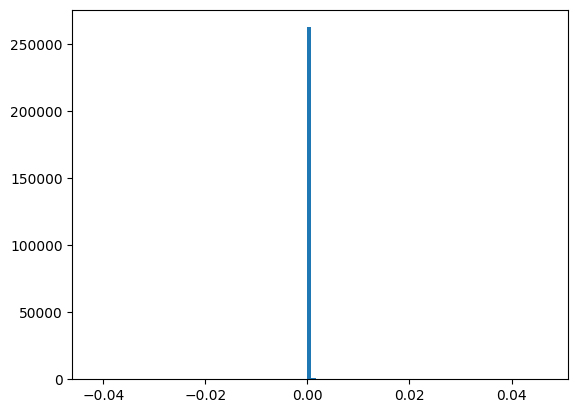

In [189]:
plt.hist(image.load_img(NPS).get_fdata().ravel(), 100)

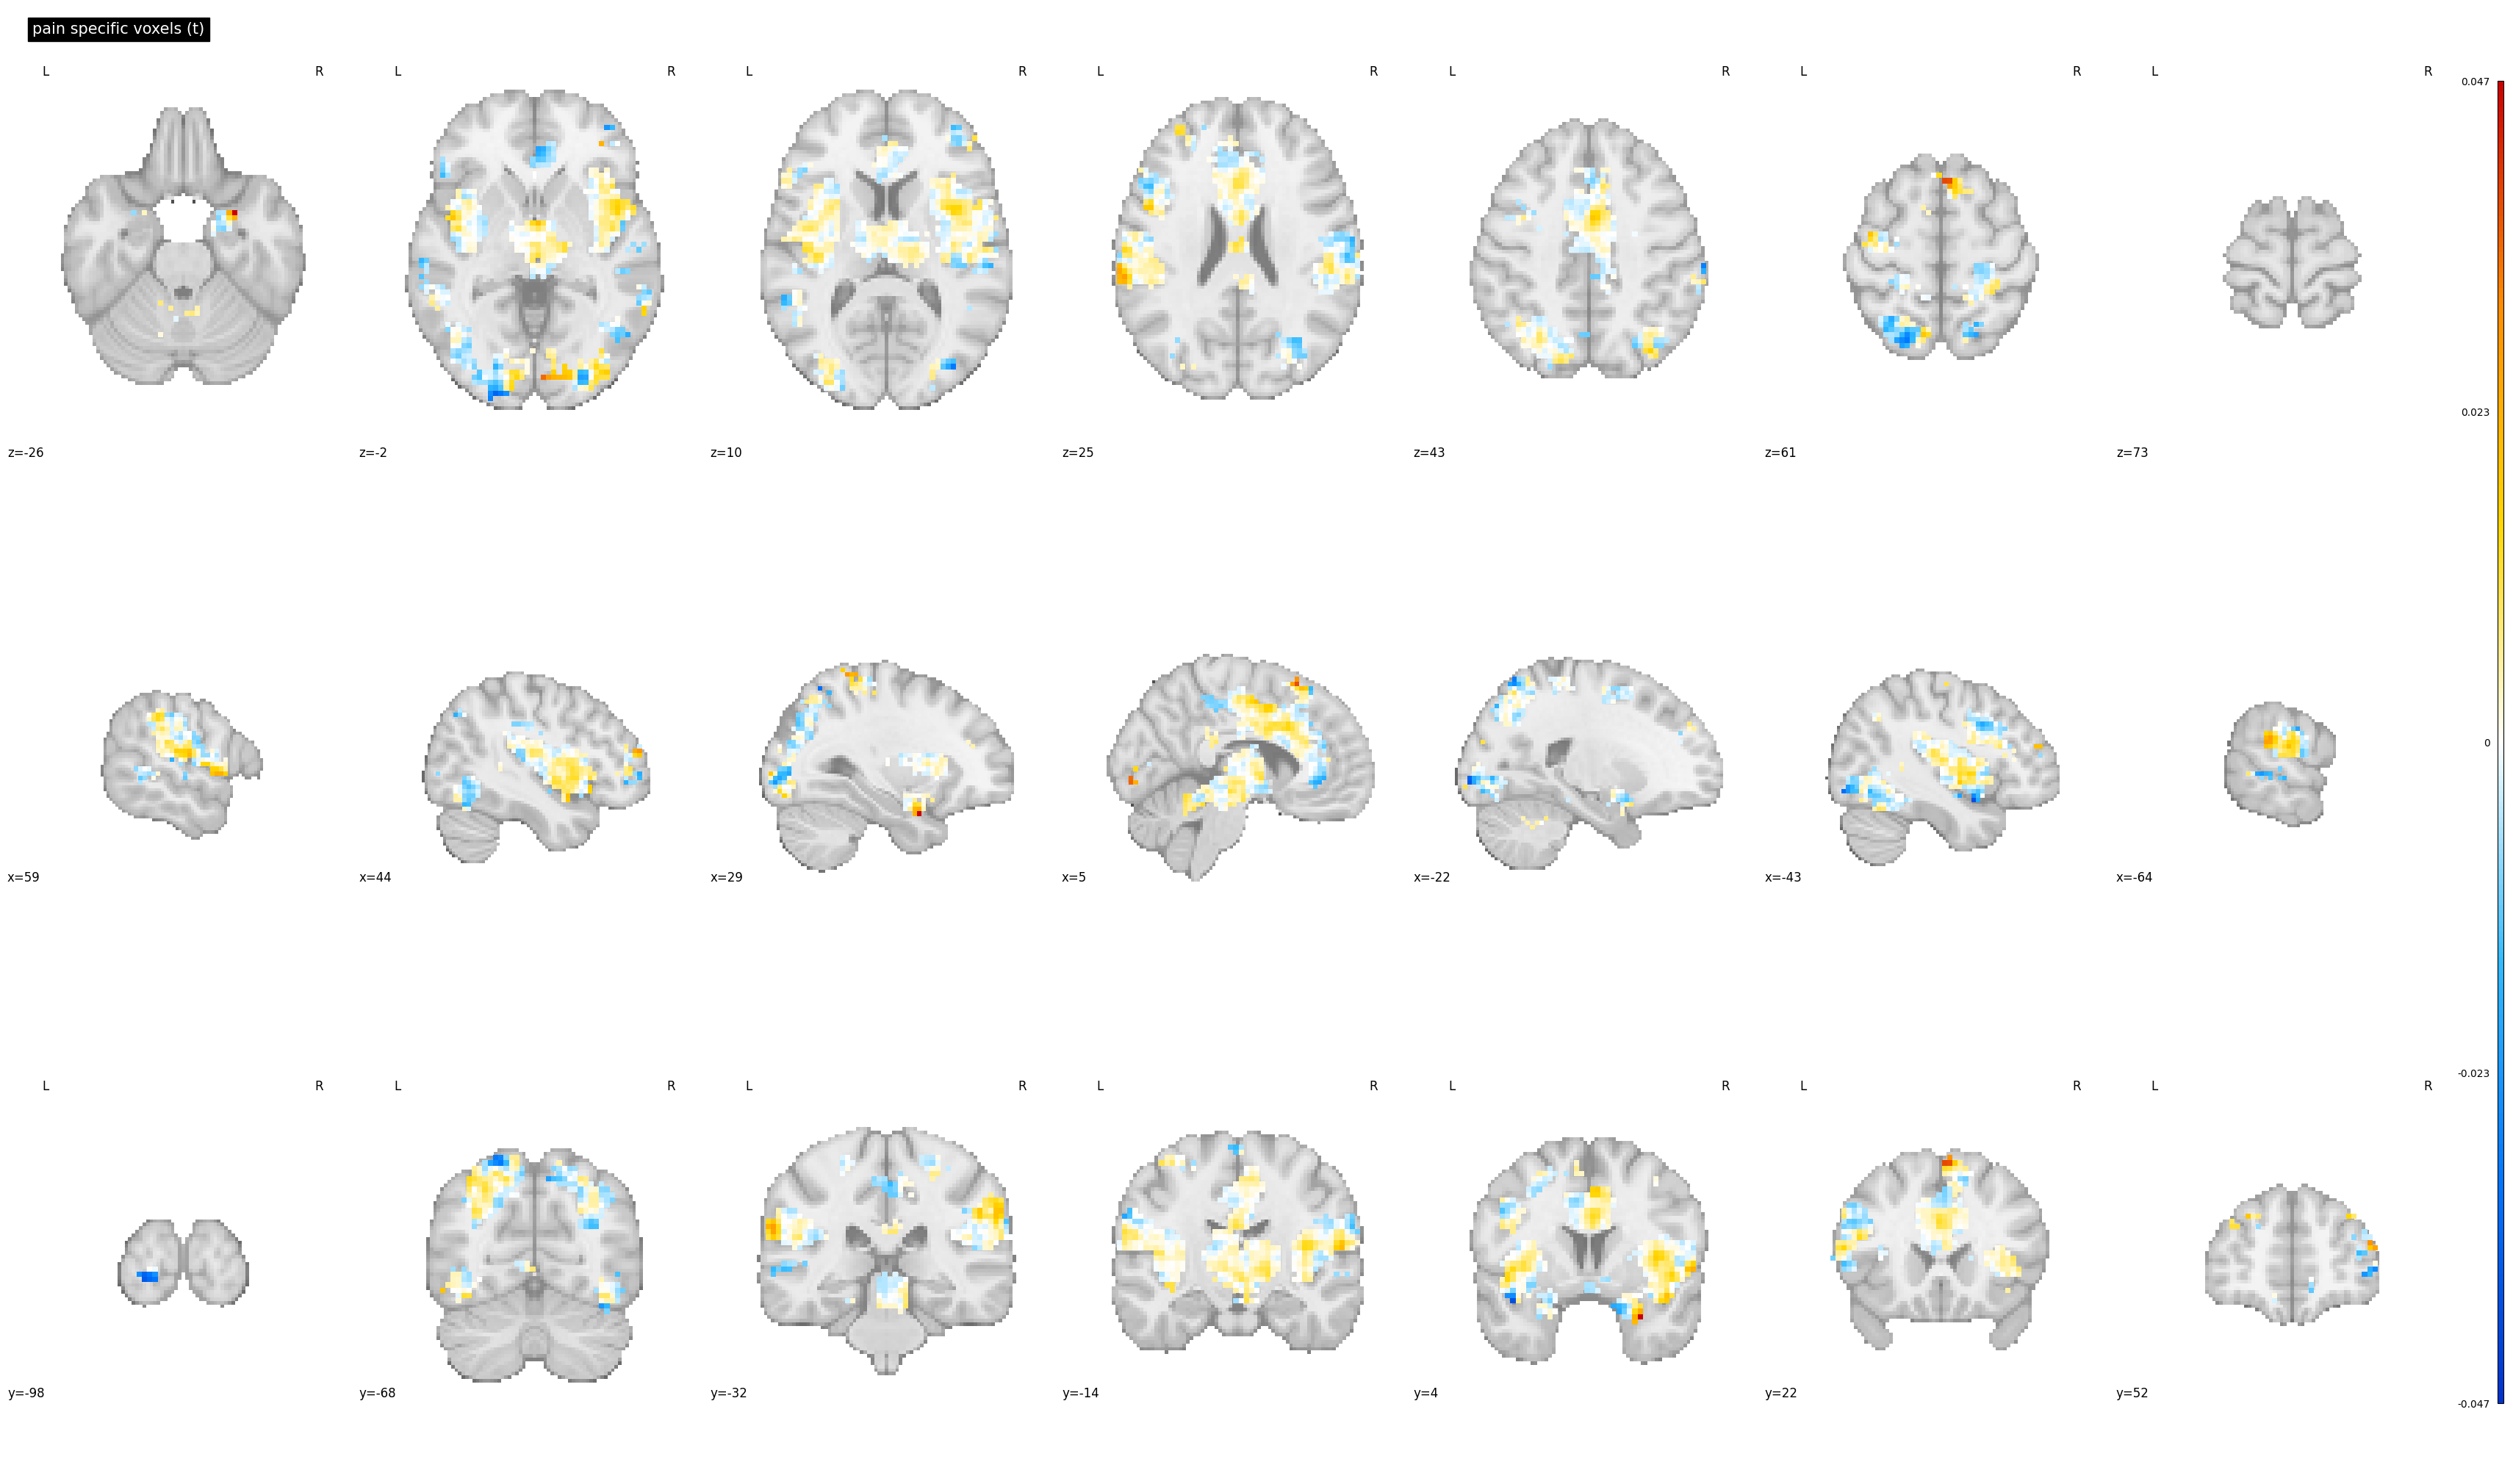

In [203]:
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
NPS = '/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz'
NPSmni = plotting.plot_stat_map(image.load_img(NPS), display_mode='mosaic', title='pain specific voxels (t)',cmap=bright_cmap)
                                # nilearn_cmaps['cold_white_hot'] )


pain range: 0.029916884377598763 -0.026710303500294685


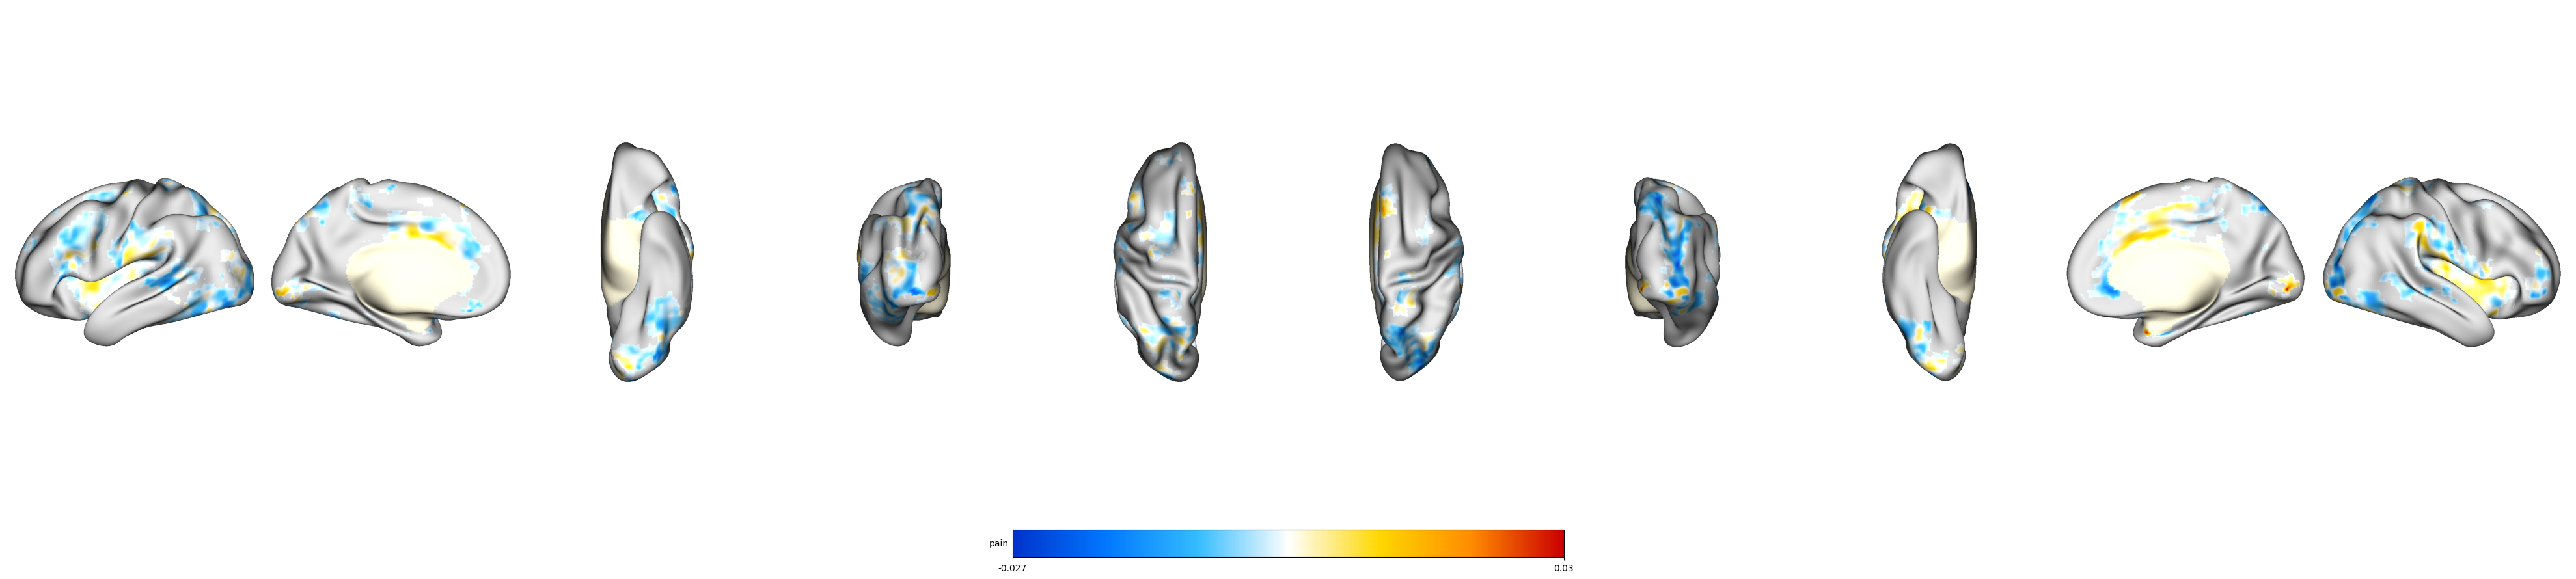

In [199]:
pain_stim_fslr = transforms.mni152_to_fslr(NPS, fslr_density='32k', 
    method='linear')
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()))
min_pain = min(np.min(pain_stim_fslr[0].agg_data()), np.min(pain_stim_fslr[1].agg_data()))
print(f"pain range: {max_pain} {min_pain}")
max_pain = max(np.max(pain_stim_fslr[0].agg_data()), np.max(pain_stim_fslr[1].agg_data()),
              np.abs(np.min(pain_stim_fslr[0].agg_data())), np.abs(np.max(pain_stim_fslr[0].agg_data())))
# pain_stim_fslr[0].agg_data()[medial_wall_mask] = np.nan
# pain_stim_fslr[1].agg_data()[medial_wall_mask] = np.nan


p = plot_brain_surfaces(pain_stim_fslr, cbar_label='pain', cmap=bright_cmap )#nilearn_cmaps['cold_white_hot'] )
                    # color_range=(-np.round(max_pain), np.round(np.max(max_pain))))


## SIIPS

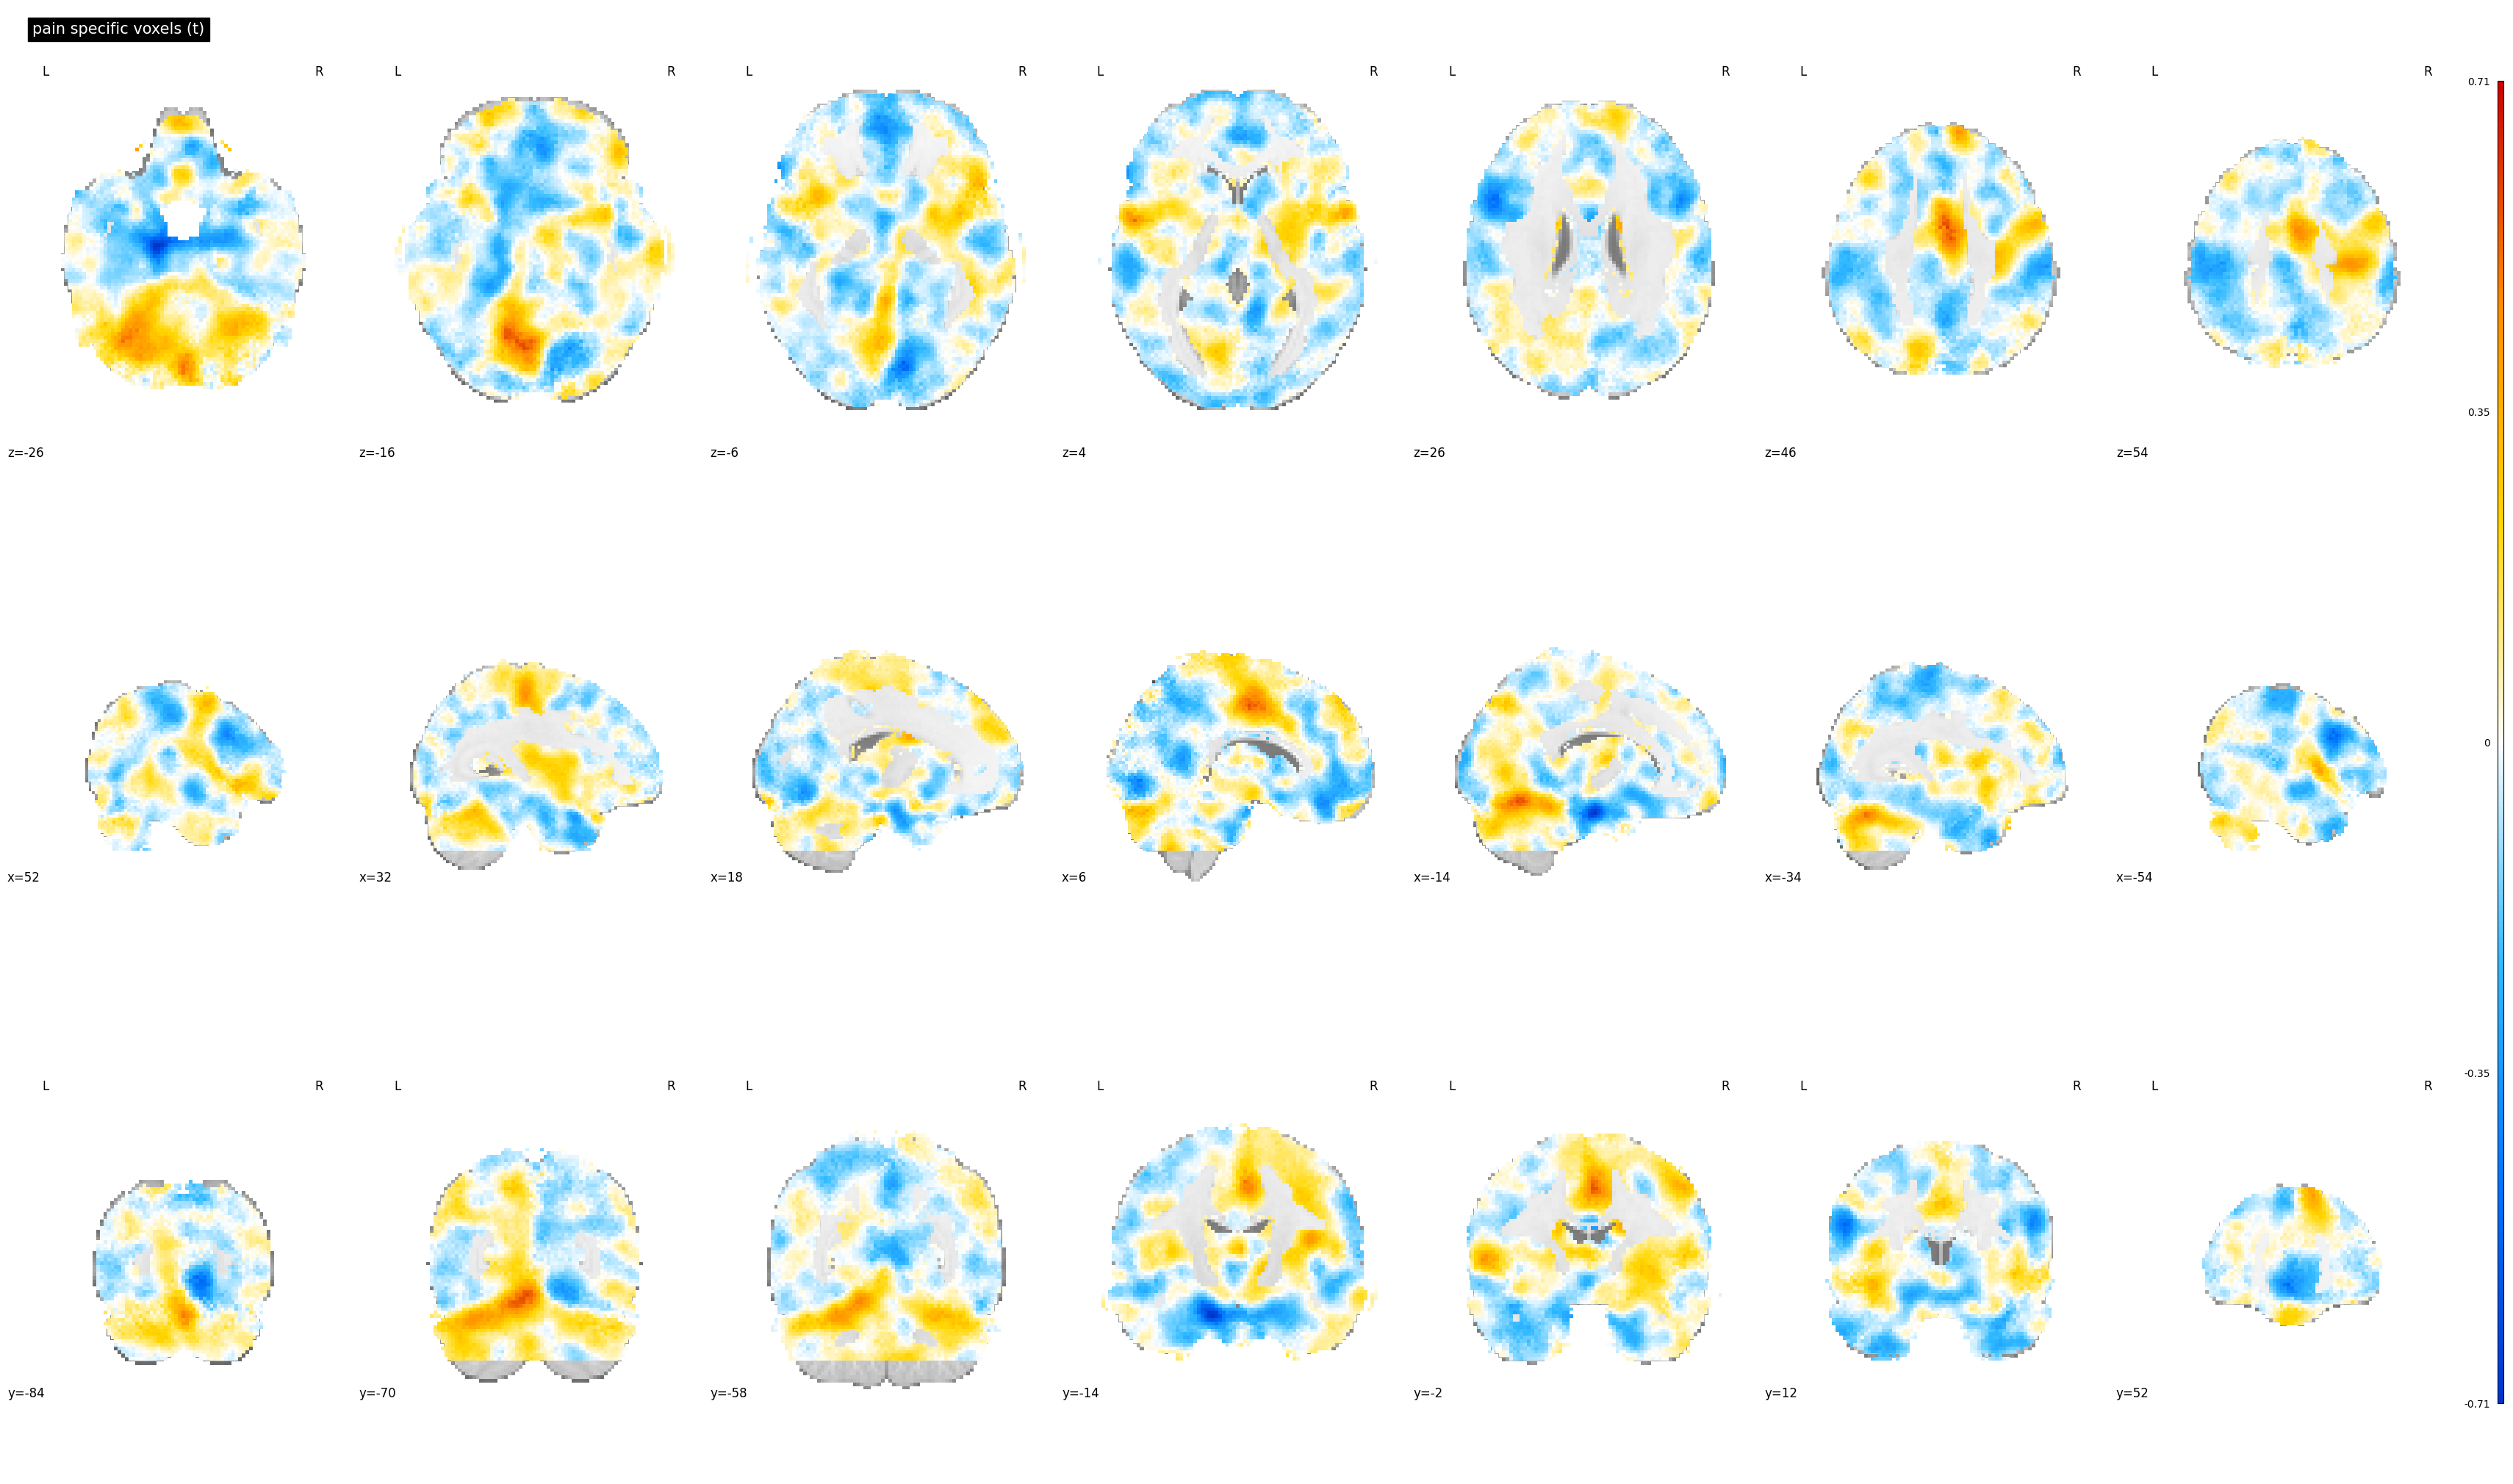

In [190]:
siips_fname = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Multivariate_signature_patterns/2017_Woo_SIIPS1/nonnoc_v11_4_137subjmap_weighted_mean.nii.gz'
NPSmni = plotting.plot_stat_map(image.load_img(siips_fname), display_mode='mosaic', title='pain specific voxels (t)',cmap=bright_cmap)
                                # nilearn_cmaps['cold_white_hot'] )
